In [1]:
import numpy as np
import matplotlib.pyplot as plt

The data points are scrapped from Morrissey et al. (2018) for a the shape of a sky emission line

In [2]:
points = np.array([
    557.6953080361214, -0.0001593237860670893,
    557.6781429049225, 0.004943902216547613,
    557.6624717686764, 0.002234181641279198,
    557.6497852169417, 0.0021514792179766484,
    557.632247924838, 0.002037155279881908,
    557.6158300343579, 0.0019301286144313146,
    557.6042623977621, 0.004462282222020608,
    557.7900830672869, 0.005673629480982489,
    557.8094865152482, 0.003192556781903555,
    557.8307546596126, 0.005938763720393814,
    557.8531436650552, 0.0008695916567860174,
    557.878143148165, 0.003640122837423654,
    557.8967993554076, 0.0063693028064102375,
    557.7759005746602, 0.023834108668552734,
    557.7654455289002, 0.06287938216425037,
    557.7598339262366, 0.14106965854845188,
    557.7575815014138, 0.21406670923409132,
    557.7549530238073, 0.3027066800450007,
    557.7534434613397, 0.39396150688680187,
    557.7515646568761, 0.46435343123840855,
    557.7496834199884, 0.5477831493812527,
    557.7485513697588, 0.6155723798230416,
    557.7466730517801, 0.683356745416401,
    557.7459155948796, 0.7433257320076625,
    557.744408951321, 0.818935206299979,
    557.7429023077624, 0.8945446805922955,
    557.7395299948311, 0.9701419927635382,
    557.7369122198911, 1.001415670893004,
    557.7331867189637, 0.9701006415518869,
    557.7309625102617, 0.8918592842591752,
    557.72836565417, 0.811007935784001,
    557.7272608470917, 0.7327738757639336,
    557.7261526346194, 0.6727927270515983,
    557.7250483140259, 0.5919511082732835,
    557.7231986986529, 0.5058895071300442,
    557.7213495697649, 0.4172203472285574,
    557.7191277934871, 0.32594119614460837,
    557.7165348292741, 0.22422937760345496,
    557.7139404056066, 0.13034023533704397,
    557.7094759342028, 0.059906959773785795,
    557.7042593572319, 0.02075952446106699])

In [3]:
from scipy.optimize import minimize

x, y = points[::2], points[1::2]

def gauss(params, _x=x):
    a, m, s = params
    
    return a / np.sqrt(2 * np.pi) / s * np.exp( - (m - _x)**2 / s**2 / 2.)
            
           
def lorentz(params, _x=x):
    a, m, g = params
    
    return a * (1/np.pi) * 0.5 * g / ((m  - _x)**2 + (0.5 * g)**2)


def moffat(params, _x=x):
    amp, m, a, b = params
    
    return amp * (b - 1)/(np.pi * a*a) * (1 + ((_x - m)**2)/a**2)**(-b)

def func(params, f=gauss):
        return np.sum((f(params) - y)**2)


In [4]:
res = minimize(func, [1.2, 557.74, 0.15])

In [5]:
res 

      fun: 0.004623047338276228
 hess_inv: array([[ 6.22091971e-05, -5.74293837e-07,  1.74770299e-05],
       [-5.74293837e-07,  1.15820218e-05, -4.21585170e-08],
       [ 1.74770299e-05, -4.21585170e-08,  1.69008337e-05]])
      jac: array([-3.20443069e-05,  1.10613066e-04,  1.09322486e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 376
      nit: 57
     njev: 91
   status: 2
  success: False
        x: array([2.96673257e-02, 5.57736813e+02, 1.17134144e-02])

In [6]:
res_lorentz = minimize(func, res.x, args=(lorentz))

In [7]:
res_lorentz

      fun: 0.12387058707308823
 hess_inv: array([[ 1.48264561e-04, -5.31178574e-07,  9.06319383e-05],
       [-5.31178574e-07,  1.26021874e-05,  5.06955059e-07],
       [ 9.06319383e-05,  5.06955059e-07,  1.24532388e-04]])
      jac: array([ 2.31340528e-06,  1.58576295e-05, -7.25593418e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 238
      nit: 11
     njev: 57
   status: 2
  success: False
        x: array([4.12646153e-02, 5.57736795e+02, 2.41395477e-02])

In [8]:
res_moffat = minimize(func, [2.96673257e-02, 5.57736813e+02, 1.17134144e-02, 2], args=(moffat))

In [9]:
res_moffat

      fun: 0.004625147760763726
 hess_inv: array([[ 1.45308073e-07, -1.21925233e-08,  1.15842093e-04,
         2.73477287e-01],
       [-1.21925233e-08,  1.17104294e-05,  1.75392793e-05,
         1.63338652e-01],
       [ 1.15842093e-04,  1.75392793e-05,  4.68373181e-01,
         1.76746765e+03],
       [ 2.73477287e-01,  1.63338652e-01,  1.76746765e+03,
         7.03336250e+06]])
      jac: array([ 7.12352426e-03,  1.76579342e-04, -7.30250031e-06,  8.14907253e-10])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 867
      nit: 115
     njev: 171
   status: 2
  success: False
        x: array([8.71346359e-04, 5.57736813e+02, 5.83320259e-01, 1.24069538e+03])

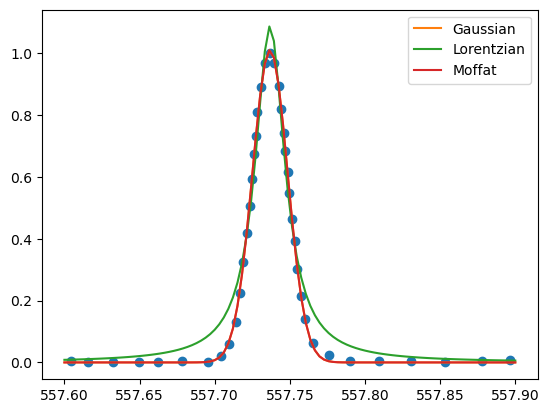

In [11]:
plt.plot(x, y, ls='none', marker='o')

xs = np.linspace(557.6, 557.90, 100)

plt.plot(xs, gauss(res.x, xs), label='Gaussian')
plt.plot(xs, lorentz(res_lorentz.x, xs), label='Lorentzian')
plt.plot(xs, moffat(res_moffat.x, xs), label='Moffat')

plt.legend()

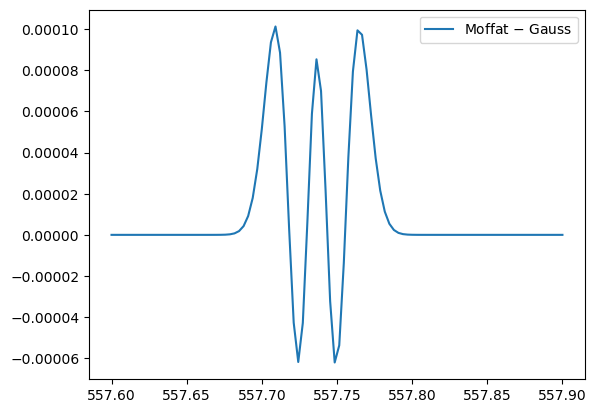

In [13]:
plt.plot(xs, moffat(res_moffat.x, xs) - gauss(res.x, xs), label=r'Moffat $-$ Gauss')

plt.legend()